In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [19]:
df=pd.read_csv("../data/raw/data_clean.csv")

In [20]:
df=df.drop(columns=["CustomerID"], axis=1)
df

,Age,Gender,MaritalStatus,IncomeLevel,TotalSpent,NumTransactions,NumInteractions,UnresolvedCount,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus,Churn,AgeGroup
0,62,M,Single,Low,416.50,1,1.0,0.0,2023-10-21,34,Mobile App,0,Not Churned,60-69
1,65,M,Married,Low,1547.42,7,1.0,0.0,2023-12-05,5,Website,1,Churned,60-69
2,18,M,Single,Low,1702.98,6,1.0,0.0,2023-11-15,3,Website,0,Not Churned,<20
3,21,M,Widowed,Low,917.29,5,2.0,1.0,2023-08-25,2,Website,0,Not Churned,20-29
4,21,M,Divorced,Medium,2001.49,8,0.0,0.0,2023-10-27,41,Website,0,Not Churned,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,F,Single,Low,227.25,1,0.0,0.0,2023-01-29,38,Mobile App,0,Not Churned,50-59
996,19,M,Widowed,High,419.82,2,0.0,0.0,2023-04-01,5,Mobile App,0,Not Churned,<20
997,47,M,Married,Low,252.15,1,0.0,0.0,2023-07-10,47,Website,0,Not Churned,40-49
998,23,M,Widowed,High,2393.26,9,0.0,0.0,2023-01-08,23,Website,0,Not Churned,20-29


## Univariate Analysis

In [6]:


# Lloyds Bank colour scheme
lloyds_colors = ['#005A30', '#000000', '#B1B3B3', '#FFFFFF']

# Create a 2x2 subplot layout; specify pie type in (2,2)
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "xy"}, {"type": "xy"}],
           [{"type": "xy"}, {"type": "domain"}]],
    subplot_titles=("Age Distribution", "Marital Status", "Income Level", "Churn Status")
)

# Age distribution
fig.add_trace(go.Histogram(x=df['Age'], marker_color=lloyds_colors[0]), row=1, col=1)

# Marital status
fig.add_trace(go.Bar(
    x=df['MaritalStatus'].value_counts().index,
    y=df['MaritalStatus'].value_counts().values,
    marker_color=lloyds_colors[1]
), row=1, col=2)

# Income level
fig.add_trace(go.Bar(
    x=df['IncomeLevel'].value_counts().index,
    y=df['IncomeLevel'].value_counts().values,
    marker_color=lloyds_colors[2]
), row=2, col=1)

# Churn status (pie chart)
fig.add_trace(go.Pie(
    labels=df['Churn'].value_counts().index,
    values=df['Churn'].value_counts().values,
    marker=dict(colors=[lloyds_colors[0], lloyds_colors[1]])
), row=2, col=2)

# Update layout
fig.update_layout(title_text="Demographic Distributions", showlegend=False, template="simple_white")
fig.show()


Insights:
1. Majority of Customers belong to a more mature age group and are either married, divorced or widowed.
2. More customers in the high income-band, but the distribution is not significantly different.
3. Approximately 20% customers have historically churned.

Note: Targetting the young demographic might increase customer base.

## Correlations Heatmap

In [15]:


# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Lloyds-inspired custom color scale
lloyds_colorscale = [
    [0.0, "#FFFFFF"],
    [0.25, "#B1B3B3"],
    [0.5, "#000000"],
    [0.75, "#005A30"],
    [1.0, "#005A30"]
]

# Plot heatmap with improved layout
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale=lloyds_colorscale,
    title="Correlation Heatmap",
    aspect="auto"
)

# Update layout for readability
fig.update_layout(
    template="simple_white",
    width=900,
    height=700,
    font=dict(size=12),
    margin=dict(l=50, r=50, t=70, b=50)
)
fig.update_xaxes(tickangle=45)
fig.show()


1. Low log-in frequency seem to be correlated to customers churning.
2. Customers with higher transactions seem to have higher number of interactions with the support.

Note: Make remote services more user-friendly?


In [16]:

from scipy.stats import gaussian_kde

# Select numeric columns
numeric_columns = df.select_dtypes(include='number').columns
n = len(numeric_columns)

# Determine subplot grid size
cols = 3
rows = (n + cols - 1) // cols

# Lloyds Bank colours (repeat if needed)
lloyds_palette = ['#005A30', '#000000', '#B1B3B3', '#00703C', '#004225', '#666666', '#003E2F', '#222222']

# Create subplot grid
fig = make_subplots(rows=rows, cols=cols, subplot_titles=numeric_columns)

# Plot each KDE
for i, col in enumerate(numeric_columns):
    data = df[col].dropna()
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 200)
    y_vals = kde(x_vals)

    row = i // cols + 1
    col_pos = i % cols + 1

    fig.add_trace(go.Scatter(
        x=x_vals,
        y=y_vals,
        mode='lines',
        name=col,
        line=dict(color=lloyds_palette[i % len(lloyds_palette)]),
        showlegend=False
    ), row=row, col=col_pos)

# Update layout
fig.update_layout(
    height=250 * rows,
    width=1000,
    title_text="",
    template='simple_white',
    margin=dict(t=60)
)
fig.show()


In [ ]:
# Lloyds Bank colour scheme
lloyds_colors = ['#005A30', '#000000']

# 2x2 subplot setup
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Total Spent vs Churn",
        "Login Frequency vs Churn",
        "Num Interactions vs Churn",
        "Unresolved Issues vs Churn"
    )
)

# Total Spent vs Churn
fig.add_trace(go.Box(
    y=df['TotalSpent'],
    x=df['Churn'],
    marker_color=lloyds_colors[0],
    name="Total Spent"
), row=1, col=1)

# Login Frequency vs Churn
fig.add_trace(go.Box(
    y=df['LoginFrequency'],
    x=df['Churn'],
    marker_color=lloyds_colors[1],
    name="Login Frequency"
), row=1, col=2)

# Num Interactions vs Churn
fig.add_trace(go.Box(
    y=df['NumInteractions'],
    x=df['Churn'],
    marker_color=lloyds_colors[0],
    name="Interactions"
), row=2, col=1)

# Unresolved Issues vs Churn
fig.add_trace(go.Box(
    y=df['UnresolvedCount'],
    x=df['Churn'],
    marker_color=lloyds_colors[1],
    name="Unresolved"
), row=2, col=2)

# Layout and styling
fig.update_layout(
    title_text="Bivariate Analysis: Customer Behavior vs Churn",
    template="simple_white",
    showlegend=False,
    height=700,
    width=900
)
fig.show()


1. Churned customers seem to have lower transaction amounts on average
2. Customers who churned, logged in less frequently 

In [10]:


# Lloyds Bank colours
lloyds_colors = ['#005A30', '#000000']

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Marital Status vs Churn",
        "Age Group vs Churn",
        "Service Used vs Churn",
        "Gender vs Churn"
    )
)

# Helper function to add bar traces
def add_bar_trace(df, x_col, row, col, color):
    grouped = df.groupby([x_col, 'Churn']).size().unstack().fillna(0)
    for i, churn_status in enumerate(grouped.columns):
        fig.add_trace(go.Bar(
            x=grouped.index,
            y=grouped[churn_status],
            name=churn_status,
            marker_color=color[i % len(color)],
            showlegend=(row == 1 and col == 1)  # Show legend only once
        ), row=row, col=col)

# Add plots
add_bar_trace(df, 'MaritalStatus', 1, 1, lloyds_colors)
add_bar_trace(df, 'AgeGroup', 1, 2, lloyds_colors)
add_bar_trace(df, 'ServiceUsage', 2, 1, lloyds_colors)
add_bar_trace(df, 'Gender', 2, 2, lloyds_colors)

# Layout styling
fig.update_layout(
    title_text="Categorical Variables vs Churn",
    barmode='group',
    template="simple_white",
    height=700,
    width=900
)

fig.show()


1. Lowest Churn is observed in the younger demographic.
2. Majority of Churned customer appear to have been amongst mobile app and Online Banking users.
3. Married and Widowed individuals have historically churned more compared to divorced and singles.


C:\Users\ARKA\AppData\Local\Temp\ipykernel_34184\2114443884.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




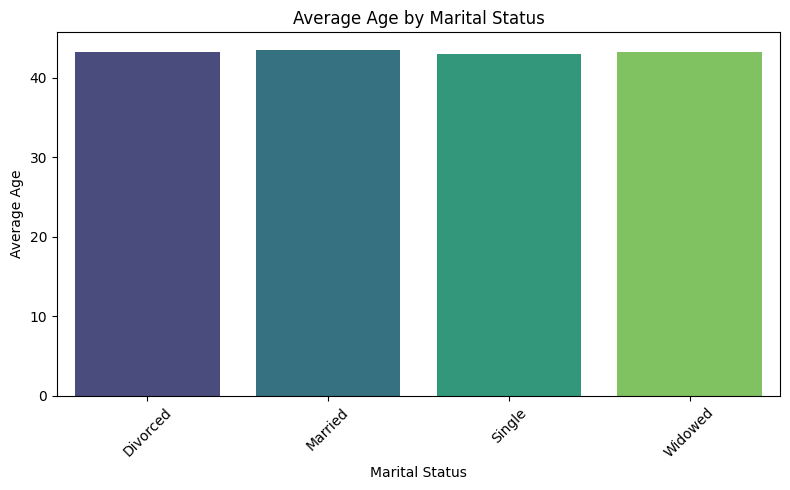

In [25]:
avg_age = df.groupby('MaritalStatus')['Age'].mean().reset_index()

# --- 2. Plot using seaborn ---
plt.figure(figsize=(8, 5))
sns.barplot(x='MaritalStatus', y='Age', data=avg_age, palette='viridis')

plt.title("Average Age by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusions

Customer Demographics

Majority of customers are older (age 40+), and predominantly married, divorced, or widowed.

Young and single customers represent a smaller portion, but they churn the least.

Churn is higher among married and widowed customers.

Income & Activity

More customers fall into a high income-band, but income does not significantly affect churn.

Customers who churned tend to:

Have fewer logins (low engagement).

Make fewer and lower-value transactions.

Use remote channels (e.g., mobile app, online banking) more, but not effectively.

Support & Engagement

Customers with more transactions also interact more with customer support — possibly due to complexity or issues.

Recommendations

1. Target Younger Demographic
Why: They churn less and may be more receptive to digital services.

How: Run digital campaigns focused on convenience, app features, and rewards for younger users.

2. Improve Digital Experience
Why: Churned customers often used online/mobile banking but still disengaged.

How:

Improve UX/UI of digital channels.

Add interactive onboarding, transaction summaries, and chat-based support.

3. Re-engagement Strategy for Older Customers
Why: Older, married/widowed customers churn more, despite being the majority.

How:

Launch personalized communication.

Offer simplified tools, in-branch assistance, or hybrid services.

4. Behavioral Triggers for Retention
Why: Low login and transaction activity predict churn.

How:

Implement early warning systems for inactivity.

Trigger retention campaigns (e.g., emails, app notifications, special offers).

5. Customer Education
Why: High-income users and support-heavy customers may lack awareness of services.

How:

Provide interactive guides, support webinars, or help center content.

Promote automated and self-service tools to reduce friction